In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import os 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patheffects
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from PIL import Image

In [2]:
yesterday_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
yesterday_date

'2024-03-27'

### 

# CHARGEMENT DES DONNEES

In [3]:
dialect = 'mysql+pymysql'
user = 'root'
password = os.getenv('mdp_mySQL')
host = 'localhost'
port = 3306
database_idf = 'SNCF_TGV_TER'

engine_url = f"{dialect}://{user}:{password}@{host}:{port}/{database_idf}"
engine = create_engine(engine_url)

In [4]:
query_disruption = f"""
SELECT * FROM disruptions_tgv_ter
WHERE data_date = '{yesterday_date}'
"""

df_disruption = pd.read_sql_query(query_disruption, engine)
df_disruption = df_disruption[df_disruption['arrival_delay']>=0]
df_disruption

,id_disruption,vehicle_id,train_type,id_stop,name_stop,lon,lat,disruption_start,disruption_end,arrival_delay,departure_delay,cause_delay,data_date
0,1490ffa6-14ab-4076-acda-86cbfecb2634,SNCF:2024-03-27:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-27 18:46:00,2024-03-27 21:04:00,5.0,5.0,Confirmation tardive de la voie,2024-03-27
1,1490ffa6-14ab-4076-acda-86cbfecb2634,SNCF:2024-03-27:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87393702:LongDistanceTrain,Massy TGV,2.261250,48.7258,2024-03-27 18:46:00,2024-03-27 21:04:00,5.0,5.0,Confirmation tardive de la voie,2024-03-27
2,1490ffa6-14ab-4076-acda-86cbfecb2634,SNCF:2024-03-27:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-27 18:46:00,2024-03-27 21:04:00,5.0,5.0,Confirmation tardive de la voie,2024-03-27
3,e9dbe293-5254-4779-8a90-0f68b7d931ab,SNCF:2024-03-27:12250:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-27 08:46:00,2024-03-27 11:13:00,20.0,20.0,Défaut d'alimentation électrique,2024-03-27
4,e9dbe293-5254-4779-8a90-0f68b7d931ab,SNCF:2024-03-27:12250:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-27 08:46:00,2024-03-27 11:13:00,0.0,0.0,Défaut d'alimentation électrique,2024-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,6c85e1b5-9a9b-4c43-b497-ee4d3a37513c,SNCF:2024-03-27:99209:1187:LongDistanceTrain,TGV,stop_point:SNCF:83002048:LongDistanceTrain,Oulx-Cesana-Claviere-Sestriere,6.831430,45.0388,2024-03-27 17:44:00,2024-03-27 23:25:00,15.0,15.0,Dérangement d'une installation en gare,2024-03-27
7409,6c85e1b5-9a9b-4c43-b497-ee4d3a37513c,SNCF:2024-03-27:99209:1187:LongDistanceTrain,TGV,stop_point:SNCF:83002220:LongDistanceTrain,Torino Porta Susa,7.666680,45.0741,2024-03-27 17:44:00,2024-03-27 23:25:00,15.0,15.0,Dérangement d'une installation en gare,2024-03-27
7410,6c85e1b5-9a9b-4c43-b497-ee4d3a37513c,SNCF:2024-03-27:99209:1187:LongDistanceTrain,TGV,stop_point:SNCF:83016451:LongDistanceTrain,Milano Porta Garibaldi,9.187690,45.4849,2024-03-27 17:44:00,2024-03-27 23:25:00,15.0,15.0,Dérangement d'une installation en gare,2024-03-27
7411,6c85e1b5-9a9b-4c43-b497-ee4d3a37513c,SNCF:2024-03-27:99209:1187:LongDistanceTrain,TGV,stop_point:SNCF:87741009:LongDistanceTrain,Chambéry - Challes-les-Eaux,5.919550,45.5713,2024-03-27 17:44:00,2024-03-27 23:25:00,15.0,15.0,Dérangement d'une installation en gare,2024-03-27


In [5]:
query_vehicle = f"""
SELECT * FROM vehicle_journeys_tgv_ter
WHERE data_date = '{yesterday_date}'
"""

df_vehicle = pd.read_sql_query(query_vehicle, engine)
df_vehicle['vehicle_id'] = df_vehicle['vehicle_id'].apply(lambda x: ':'.join(x.split(':')[1:]))
df_vehicle

,vehicle_id,route_id,time_begin,time_end,train_type,id_disruption,data_date
0,SNCF:2024-03-27:12244:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 18:46:00,0 days 20:59:00,Train grande vitesse,1490ffa6-14ab-4076-acda-86cbfecb2634,2024-03-27
1,SNCF:2024-03-27:12250:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 08:46:00,0 days 10:53:00,Train grande vitesse,e9dbe293-5254-4779-8a90-0f68b7d931ab,2024-03-27
2,SNCF:2024-03-27:12251:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 07:04:00,0 days 09:14:00,Train grande vitesse,None,2024-03-27
3,SNCF:2024-03-27:12254:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 10:46:00,0 days 12:53:00,Train grande vitesse,None,2024-03-27
4,SNCF:2024-03-27:12255:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 11:04:00,0 days 13:14:00,Train grande vitesse,f478e1b7-423c-4b37-84d8-02fdd4c12710,2024-03-27
...,...,...,...,...,...,...,...
8986,SNCF:2024-03-27:9890:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 05:59:00,0 days 09:43:00,Train grande vitesse,None,2024-03-27
8987,SNCF:2024-03-27:9894:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 17:01:00,0 days 21:01:00,Train grande vitesse,None,2024-03-27
8988,SNCF:2024-03-27:9896:1187:LongDistanceTrain,route:SNCF:CSR:071100,0 days 15:56:00,0 days 23:49:00,Train grande vitesse,None,2024-03-27
8989,SNCF:2024-03-27:9898:1187:LongDistanceTrain,route:SNCF:CSR:071200,0 days 06:31:00,0 days 14:15:00,Train grande vitesse,None,2024-03-27


In [6]:
df_lines = pd.read_sql_table('pt_lines_tgv_ter', engine)
df_lines = df_lines[df_lines['network_name'] != 'NightJet']
df_lines

,route_id,route_name,train_type,network_name,opening_time,closing_time
0,route:SNCF:0018-80100537-87271007,Dortmund Hbf - Paris Nord,Train grande vitesse,Eurostar,05:18:00,12:21:00
1,route:SNCF:0018-80101840-87271007,Essen Hbf - Paris Nord,Train grande vitesse,Eurostar,07:35:00,22:14:00
2,route:SNCF:0018-80154583-87271007,Köln - Hauptbahnhof - Paris Nord,Train grande vitesse,Eurostar,05:21:00,23:14:00
3,route:SNCF:0018-84000588-87111849,Amsterdam Centraal - Marne-la-Vallée - Chessy,Train grande vitesse,Eurostar,06:47:00,11:05:00
4,route:SNCF:0018-84000588-87271007,Amsterdam Centraal - Paris Nord,Train grande vitesse,Eurostar,06:11:00,23:43:00
...,...,...,...,...,...,...
363,route:stop_area:SNCF:87113001_stop_area:SNCF:8...,Paris Est - Strasbourg,Train grande vitesse,additional service,None,None
364,route:stop_area:SNCF:87394007_stop_area:SNCF:8...,Chartres - Versailles Chantiers,Train grande vitesse,additional service,None,None
365,route:stop_area:SNCF:87411017_stop_area:SNCF:8...,Rouen Rive Droite - Paris Saint-Lazare,Train grande vitesse,additional service,None,None
366,route:stop_area:SNCF:87411017_stop_area:SNCF:8...,Rouen Rive Droite - Le Havre,Train grande vitesse,additional service,None,None


# 

# 

# ANALYSE DES DONNEES

##### 

### NOMBRE DE PERTURBATION

In [7]:
nb_disruption = df_vehicle['id_disruption'].nunique()
print(f"nombre de perturbation : {nb_disruption}")

nombre de perturbation : 1417


##### 

### POURCENTAGE TRAJET IMPACTE

In [8]:
nb_vehicle_journeys = len(df_vehicle['vehicle_id'].unique())
print(f"nombre de trajet : {nb_vehicle_journeys}")

per_disrupted = nb_disruption/nb_vehicle_journeys*100
print(f"pourcentage de trajet pertubé : {round(per_disrupted,2)}%")

nombre de trajet : 8991
pourcentage de trajet pertubé : 15.76%


##### 

### TEMPS TOTAL DE PERTURBATION


In [9]:
df_disruption['duration'] = df_disruption['disruption_end'] - df_disruption['disruption_start']

In [10]:
df_disruption_unique = df_disruption[~df_disruption.duplicated(subset=['id_disruption'], keep='first')]

In [11]:
total_disruption_duration =  df_disruption_unique['duration'].sum()
print(f"temps cumulé de perturbation : {total_disruption_duration}")

temps cumulé de perturbation : 68 days 06:20:30


##### 

### INFORMATION SUR LA PREMIERE PERTURBATION DE LA JOURNEE

##### Merge des tables

In [12]:
df_merge_inter = pd.merge(df_vehicle, df_disruption.drop(['data_date','train_type'],axis=1), on=['vehicle_id','id_disruption'], how='left')
df_merge = pd.merge(df_merge_inter, df_lines.drop('train_type', axis=1), on='route_id', how='left')
df_merge = df_merge[~df_merge.duplicated(subset=['vehicle_id'], keep='first')]
df_merge

,vehicle_id,route_id,time_begin,time_end,train_type,id_disruption,data_date,id_stop,name_stop,lon,...,disruption_start,disruption_end,arrival_delay,departure_delay,cause_delay,duration,route_name,network_name,opening_time,closing_time
0,SNCF:2024-03-27:12244:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 18:46:00,0 days 20:59:00,Train grande vitesse,1490ffa6-14ab-4076-acda-86cbfecb2634,2024-03-27,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.32051,...,2024-03-27 18:46:00,2024-03-27 21:04:00,5.0,5.0,Confirmation tardive de la voie,0 days 02:18:00,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
3,SNCF:2024-03-27:12250:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 08:46:00,0 days 10:53:00,Train grande vitesse,e9dbe293-5254-4779-8a90-0f68b7d931ab,2024-03-27,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.32051,...,2024-03-27 08:46:00,2024-03-27 11:13:00,20.0,20.0,Défaut d'alimentation électrique,0 days 02:27:00,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
5,SNCF:2024-03-27:12251:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 07:04:00,0 days 09:14:00,Train grande vitesse,None,2024-03-27,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
6,SNCF:2024-03-27:12254:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 10:46:00,0 days 12:53:00,Train grande vitesse,None,2024-03-27,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
7,SNCF:2024-03-27:12255:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 11:04:00,0 days 13:14:00,Train grande vitesse,f478e1b7-423c-4b37-84d8-02fdd4c12710,2024-03-27,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.32051,...,2024-03-27 11:04:00,2024-03-27 14:04:00,40.0,40.0,Réutilisation d'un train,0 days 03:00:00,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI,05:17:00,00:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15084,SNCF:2024-03-27:9890:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 05:59:00,0 days 09:43:00,Train grande vitesse,None,2024-03-27,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Strasbourg - Bruxelles-Midi / Brussel-Zuid,TGV INOUI,05:59:00,21:11:00
15085,SNCF:2024-03-27:9894:1187:LongDistanceTrain,route:SNCF:CSR:005400,0 days 17:01:00,0 days 21:01:00,Train grande vitesse,None,2024-03-27,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Strasbourg - Bruxelles-Midi / Brussel-Zuid,TGV INOUI,05:59:00,21:11:00
15086,SNCF:2024-03-27:9896:1187:LongDistanceTrain,route:SNCF:CSR:071100,0 days 15:56:00,0 days 23:49:00,Train grande vitesse,None,2024-03-27,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Nancy - Nice,TGV INOUI,05:42:00,23:49:00
15087,SNCF:2024-03-27:9898:1187:LongDistanceTrain,route:SNCF:CSR:071200,0 days 06:31:00,0 days 14:15:00,Train grande vitesse,None,2024-03-27,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaT,Montpellier Saint-Roch - Strasbourg,TGV INOUI,05:46:00,21:09:30


In [13]:
Not_NA = 0 
i = 0

while Not_NA == 0 :
    index_first_disruption = df_merge['disruption_start'].dropna().sort_values().index[i] 
    network_first_disruption = df_merge['network_name'][index_first_disruption]
    
    if pd.isna(network_first_disruption):
        i+=1
    else : 
        hour_first_disruption = df_merge['disruption_start'][index_first_disruption]
        cause_first_disruption = df_merge['cause_delay'][index_first_disruption]
        route_first_disruption = df_merge['route_name'][index_first_disruption]
        Not_NA = 1 

In [14]:
print(f"horaire de la première perturbation de la journée : {hour_first_disruption}")
print(f"cause de la perturbation : {cause_first_disruption}")
print(f"nom de la ligne impactée : {route_first_disruption}")
print(f"réseau : {network_first_disruption}")

horaire de la première perturbation de la journée : 2024-03-27 05:11:00
cause de la perturbation : Conditions de départ non réunies
nom de la ligne impactée : Avignon Centre - Port Bou Frontiere
réseau : TER


##### 

### RESAUX LES PLUS PERTUBES (Graphique N°1) 


Note :
- Séparer le grapg en 4 (3 réseau par graph) car trop petit 
- Enlever le dernier point blanc + commencer par un point neutre
- Mettre le nom des réseaux plus au dessus à droite 

##### Extraction des informations à mettre dans les graphiques

In [15]:
# Calcul du nombre de trajets de chaque réseau 
vehicle_by_network = df_merge.groupby('network_name')['vehicle_id'].count()
vehicle_by_network

network_name
DB SNCF                    60
Eurostar                  112
Intercités                 49
Intercités de nuit          6
LEX                       111
OUIGO                      54
OUIGO Train Classique       6
TER                      3071
TER HDF                   368
TER NA                    233
TGV INOUI                 556
TGV Lyria                  33
Name: vehicle_id, dtype: int64

In [16]:
# Calcul du nombre de trajets perturbé par réseau
disrupted_vehicle_by_network = df_merge[df_merge['id_disruption'].notna()].groupby('network_name')['vehicle_id'].count()

# Gestion du cas (pas si rare que ca) où aucun trajet du réseau n'a été perturbé
for name in vehicle_by_network.index:
    if not(name in disrupted_vehicle_by_network.index):
        disrupted_vehicle_by_network[name] = 0
        
disrupted_vehicle_by_network

network_name
DB SNCF                    9
Eurostar                   1
Intercités                15
Intercités de nuit         2
LEX                       13
OUIGO                     14
OUIGO Train Classique      2
TER                      392
TER HDF                   81
TER NA                    28
TGV INOUI                149
TGV Lyria                 10
Name: vehicle_id, dtype: int64

In [17]:
# Calcul du pourcentage de perturbation pour chaque réseau
per_disrupted_vehicle_by_network = (disrupted_vehicle_by_network/vehicle_by_network *100).where(disrupted_vehicle_by_network >= 1, 0).sort_values(ascending=True)
per_disrupted_vehicle_by_network

network_name
Eurostar                  0.892857
LEX                      11.711712
TER NA                   12.017167
TER                      12.764572
DB SNCF                  15.000000
TER HDF                  22.010870
OUIGO                    25.925926
TGV INOUI                26.798561
TGV Lyria                30.303030
Intercités               30.612245
Intercités de nuit       33.333333
OUIGO Train Classique    33.333333
Name: vehicle_id, dtype: float64

In [18]:
# Calcul du retard total (à l'arrivée des gares) pour chaque réseau
total_delay_by_network = df_merge.groupby('network_name')['arrival_delay'].sum()

# Calcul du retard moyen par train pour chaque réseau
avg_delay_by_network = total_delay_by_network/vehicle_by_network

for i in range(len(disrupted_vehicle_by_network)):
    if not(disrupted_vehicle_by_network.index[i] in total_delay_by_network.index) : 
        avg_delay_by_network[i] = 0
        
# Conversion en string indicant les retards moyens en seconde
for i in range(len(avg_delay_by_network)):
    if avg_delay_by_network[i] != 0:
        avg_delay_by_network[i] = str(int(avg_delay_by_network[i]*60)) + " secondes" 
    else : 
        avg_delay_by_network[i] = "0 seconde"
    
print(f"temps moyen de retard par train en seconde pour chaque réseau : \n\n {avg_delay_by_network}")

temps moyen de retard par train en seconde pour chaque réseau : 

 network_name
DB SNCF                   40 secondes
Eurostar                  69 secondes
Intercités                97 secondes
Intercités de nuit          0 seconde
LEX                       21 secondes
OUIGO                    194 secondes
OUIGO Train Classique    100 secondes
TER                       45 secondes
TER HDF                   75 secondes
TER NA                     9 secondes
TGV INOUI                106 secondes
TGV Lyria                254 secondes
dtype: object


In [19]:
per_disrupted_vehicle_by_network

network_name
Eurostar                  0.892857
LEX                      11.711712
TER NA                   12.017167
TER                      12.764572
DB SNCF                  15.000000
TER HDF                  22.010870
OUIGO                    25.925926
TGV INOUI                26.798561
TGV Lyria                30.303030
Intercités               30.612245
Intercités de nuit       33.333333
OUIGO Train Classique    33.333333
Name: vehicle_id, dtype: float64

In [20]:
# Informations à placer sur le graphique
info = [vehicle_by_network, disrupted_vehicle_by_network, avg_delay_by_network]
info_name = ["Nombre de trajet", "Nombre de trajet \n perturbé", "Retard moyen \n par train"]

##### Graphiques

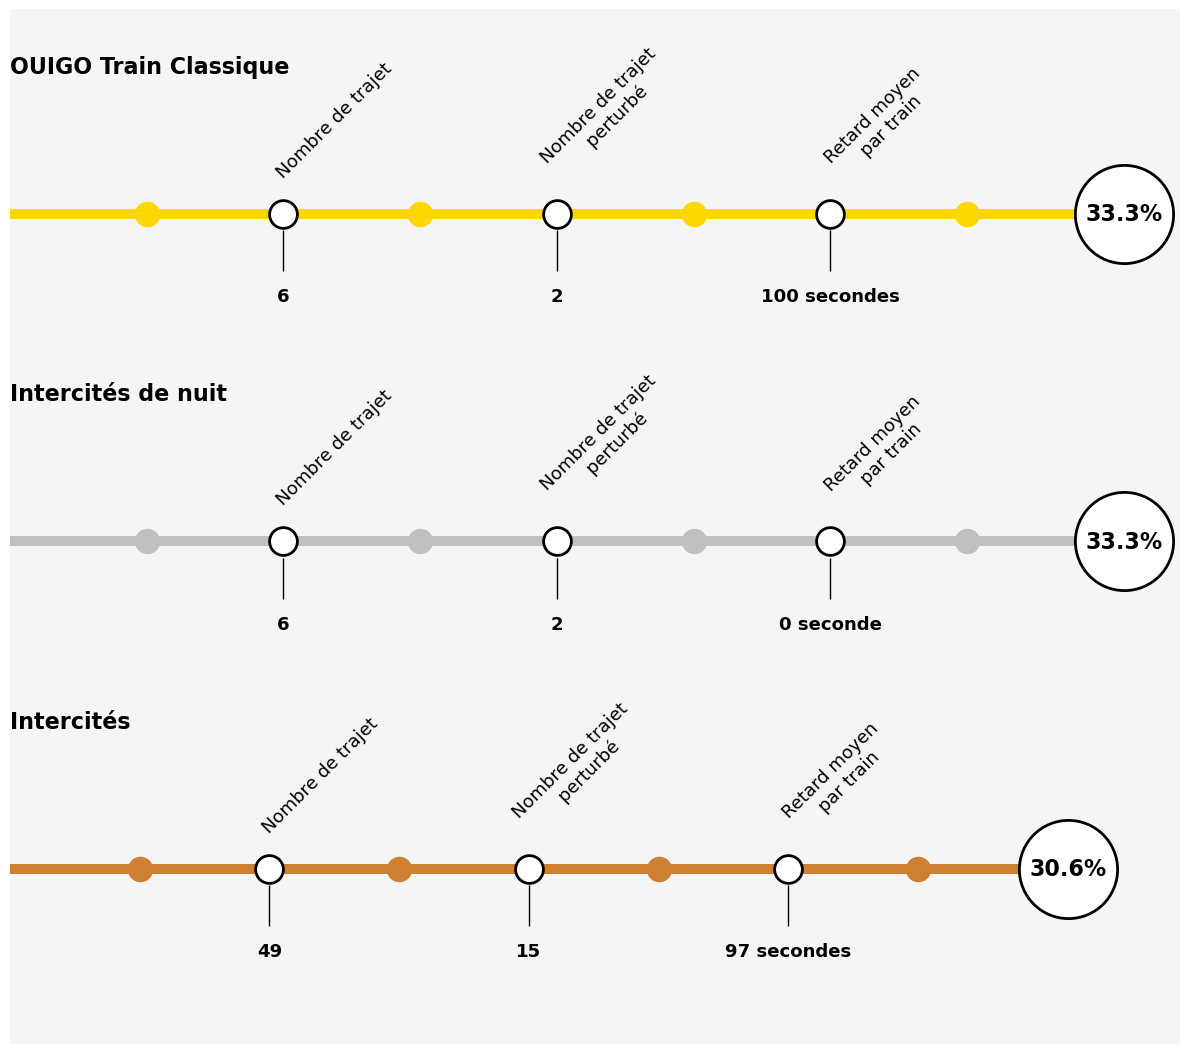

In [22]:
# Filtrage des éléments désirés directement avec Pandas
per_disrupted_vehicle_by_network_part1 = per_disrupted_vehicle_by_network.iloc[9:]

# Création d'une nouvelle Series avec les transformations souhaitées
transformation = (per_disrupted_vehicle_by_network_part1 + 20) * 0.1

# Configuration initiale de la figure
fig, ax = plt.subplots(figsize=(12, 12))
colors = ["#CD7F32", "#C0C0C0", "#FFD700"]

# Création du diagramme à barres horizontales
bars = ax.barh(transformation.index, transformation, color=colors, height=0.03)

# Calcul des positions pour les marqueurs
x_positions = transformation + 0.1

# Ajout de marqueurs blancs
ax.scatter(x_positions, transformation.index, facecolors='white', edgecolors='black', linewidths=2, s=5000)

# Définition des intervalles pour les éléments décoratifs
intervals_white = [2/8, 4/8, 6/8]
intervals_black = [1/8, 3/8, 5/8, 7/8]

# Boucle pour ajouter du texte et des décorations supplémentaires sur les barres
for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    
    # Ajout de texte pour le pourcentage
    ax.text(new_x, y, f'{bar.get_width()/0.1 - 20:.1f}%', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Ajouter le nom du réseau au-dessus de chaque barre
    ax.text(0, y + bar.get_height() + 0.4, per_disrupted_vehicle_by_network_part1.index[j], fontsize=16, fontweight='bold')
    
    # Ajout de cercles et de lignes avec du texte
    for i, interval in enumerate(intervals_white):
        circle_x = bar.get_width() * interval
        # Ajouter cercle blanc et ligne
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=400)
        ax.vlines(circle_x, y - 0.05, y - 0.175, colors='black', linewidth=1)
        # Ajouter texte spécifique sous la ligne
        current_info_value = info[i][transformation.index[j]]
        ax.text(circle_x, y - 0.225, f'{current_info_value}', ha='center', va='top', fontsize=13, fontweight='bold')
        # Ajouter texte spécifique au-dessus du cercle
        ax.text(circle_x + 0.25, y + 0.1, info_name[i], ha='center', va='bottom', fontsize=13, rotation=45)
        
    # Ajout de cercles colorés pour les intervalles neutre
    for interval in intervals_black:
        circle_x = bar.get_width() * interval
        ax.scatter(circle_x, y, facecolors=colors[j], s=300)

# Configuration finale du graphique
ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)
plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Perturbation_ligne_part1.png", dpi = 300)
plt.show()

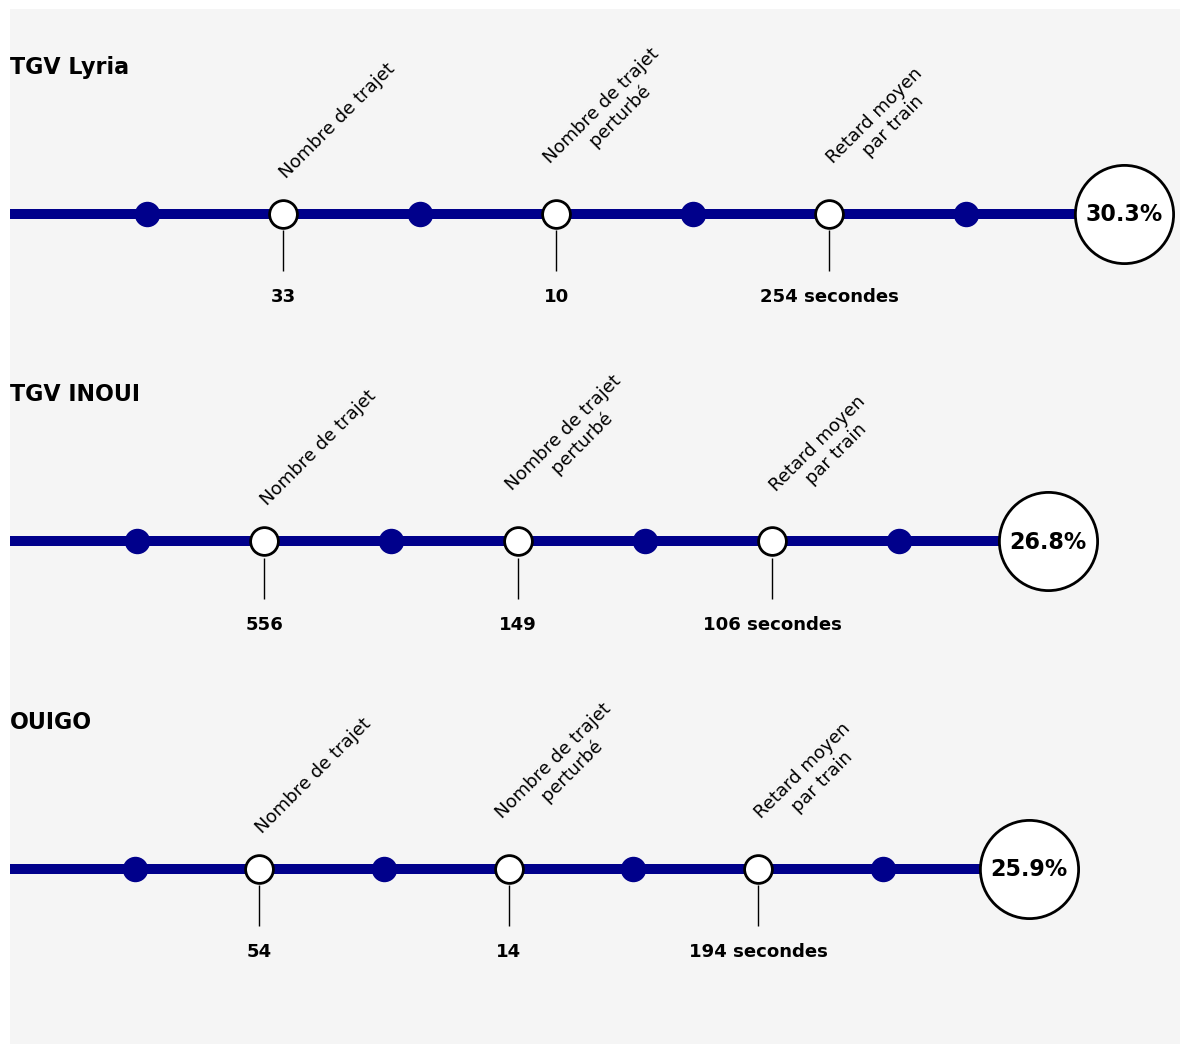

In [23]:
# Filtrage des éléments désirés directement avec Pandas
per_disrupted_vehicle_by_network_part1 = per_disrupted_vehicle_by_network.iloc[6:9]

# Création d'une nouvelle Series avec les transformations souhaitées
transformation = (per_disrupted_vehicle_by_network_part1 + 20) * 0.1

# Configuration initiale de la figure
fig, ax = plt.subplots(figsize=(12, 12))
colors = ["darkblue", "darkblue", "darkblue"]

# Création du diagramme à barres horizontales
bars = ax.barh(transformation.index, transformation, color=colors, height=0.03)

# Calcul des positions pour les marqueurs
x_positions = transformation + 0.1

# Ajout de marqueurs blancs
ax.scatter(x_positions, transformation.index, facecolors='white', edgecolors='black', linewidths=2, s=5000)

# Définition des intervalles pour les éléments décoratifs
intervals_white = [2/8, 4/8, 6/8]
intervals_black = [1/8, 3/8, 5/8, 7/8]

# Boucle pour ajouter du texte et des décorations supplémentaires sur les barres
for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    
    # Ajout de texte pour le pourcentage
    ax.text(new_x, y, f'{bar.get_width()/0.1 - 20:.1f}%', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Ajouter le nom du réseau au-dessus de chaque barre
    ax.text(0, y + bar.get_height() + 0.4, per_disrupted_vehicle_by_network_part1.index[j], fontsize=16, fontweight='bold')
    
    # Ajout de cercles et de lignes avec du texte
    for i, interval in enumerate(intervals_white):
        circle_x = bar.get_width() * interval
        # Ajouter cercle blanc et ligne
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=400)
        ax.vlines(circle_x, y - 0.05, y - 0.175, colors='black', linewidth=1)
        # Ajouter texte spécifique sous la ligne
        current_info_value = info[i][transformation.index[j]]
        ax.text(circle_x, y - 0.225, f'{current_info_value}', ha='center', va='top', fontsize=13, fontweight='bold')
        # Ajouter texte spécifique au-dessus du cercle
        ax.text(circle_x + 0.25, y + 0.1, info_name[i], ha='center', va='bottom', fontsize=13, rotation=45)
        
    # Ajout de cercles colorés pour les intervalles neutre
    for interval in intervals_black:
        circle_x = bar.get_width() * interval
        ax.scatter(circle_x, y, facecolors=colors[j], s=300)

# Configuration finale du graphique
ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)
plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Perturbation_ligne_part2.png", dpi = 300)
plt.show()

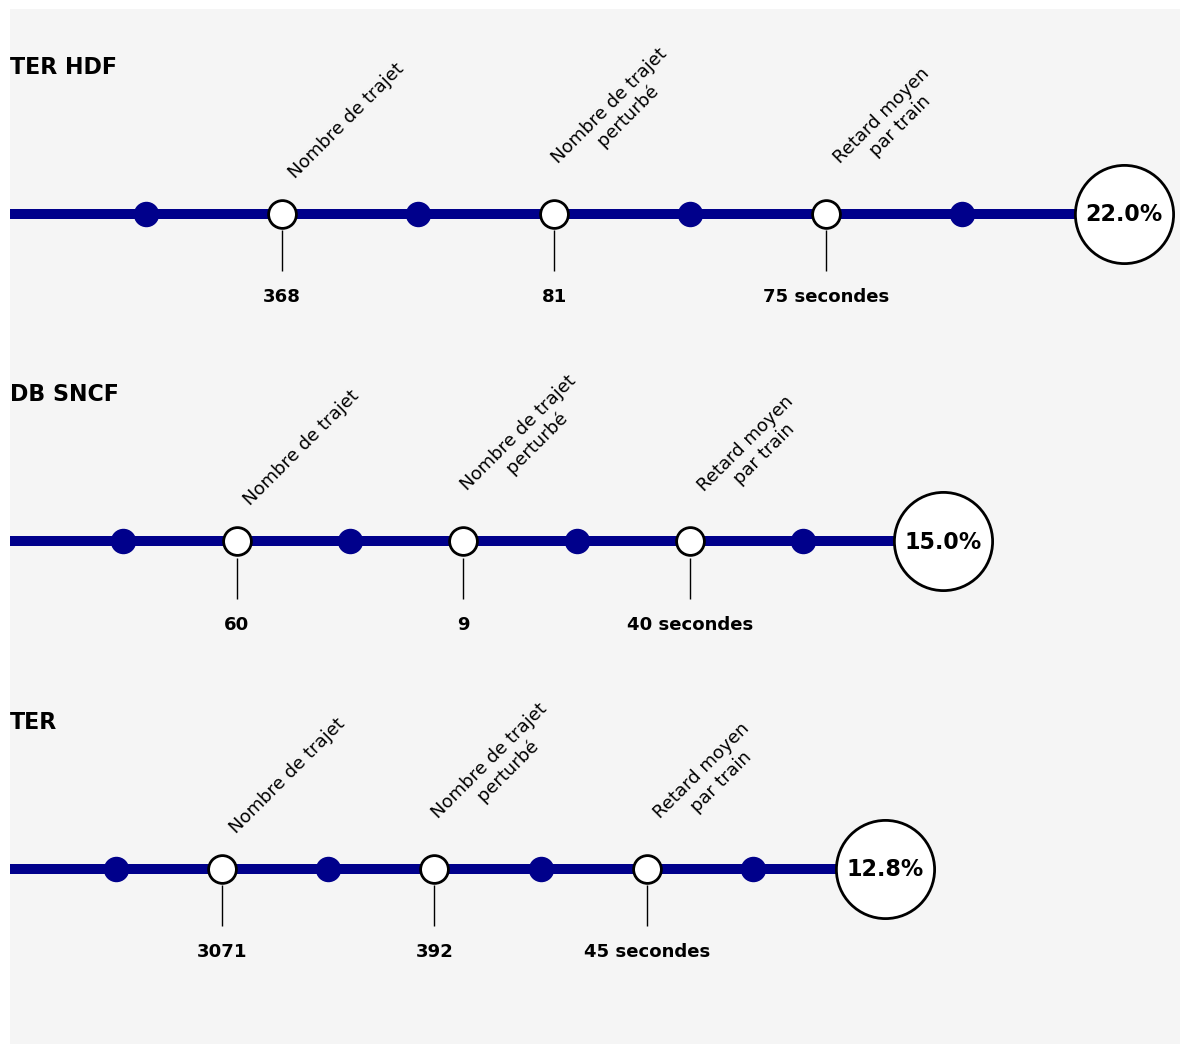

In [24]:
# Filtrage des éléments désirés directement avec Pandas
per_disrupted_vehicle_by_network_part1 = per_disrupted_vehicle_by_network.iloc[3:6]

# Création d'une nouvelle Series avec les transformations souhaitées
transformation = (per_disrupted_vehicle_by_network_part1 + 20) * 0.1

# Configuration initiale de la figure
fig, ax = plt.subplots(figsize=(12, 12))
colors = ["darkblue", "darkblue", "darkblue"]

# Création du diagramme à barres horizontales
bars = ax.barh(transformation.index, transformation, color=colors, height=0.03)

# Calcul des positions pour les marqueurs
x_positions = transformation + 0.1

# Ajout de marqueurs blancs
ax.scatter(x_positions, transformation.index, facecolors='white', edgecolors='black', linewidths=2, s=5000)

# Définition des intervalles pour les éléments décoratifs
intervals_white = [2/8, 4/8, 6/8]
intervals_black = [1/8, 3/8, 5/8, 7/8]

# Boucle pour ajouter du texte et des décorations supplémentaires sur les barres
for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    
    # Ajout de texte pour le pourcentage
    ax.text(new_x, y, f'{bar.get_width()/0.1 - 20:.1f}%', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Ajouter le nom du réseau au-dessus de chaque barre
    ax.text(0, y + bar.get_height() + 0.4, per_disrupted_vehicle_by_network_part1.index[j], fontsize=16, fontweight='bold')
    
    # Ajout de cercles et de lignes avec du texte
    for i, interval in enumerate(intervals_white):
        circle_x = bar.get_width() * interval
        # Ajouter cercle blanc et ligne
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=400)
        ax.vlines(circle_x, y - 0.05, y - 0.175, colors='black', linewidth=1)
        # Ajouter texte spécifique sous la ligne
        current_info_value = info[i][transformation.index[j]]
        ax.text(circle_x, y - 0.225, f'{current_info_value}', ha='center', va='top', fontsize=13, fontweight='bold')
        # Ajouter texte spécifique au-dessus du cercle
        ax.text(circle_x + 0.25, y + 0.1, info_name[i], ha='center', va='bottom', fontsize=13, rotation=45)
        
    # Ajout de cercles colorés pour les intervalles neutre
    for interval in intervals_black:
        circle_x = bar.get_width() * interval
        ax.scatter(circle_x, y, facecolors=colors[j], s=300)

# Configuration finale du graphique
ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)
plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Perturbation_ligne_part3.png", dpi = 300)
plt.show()

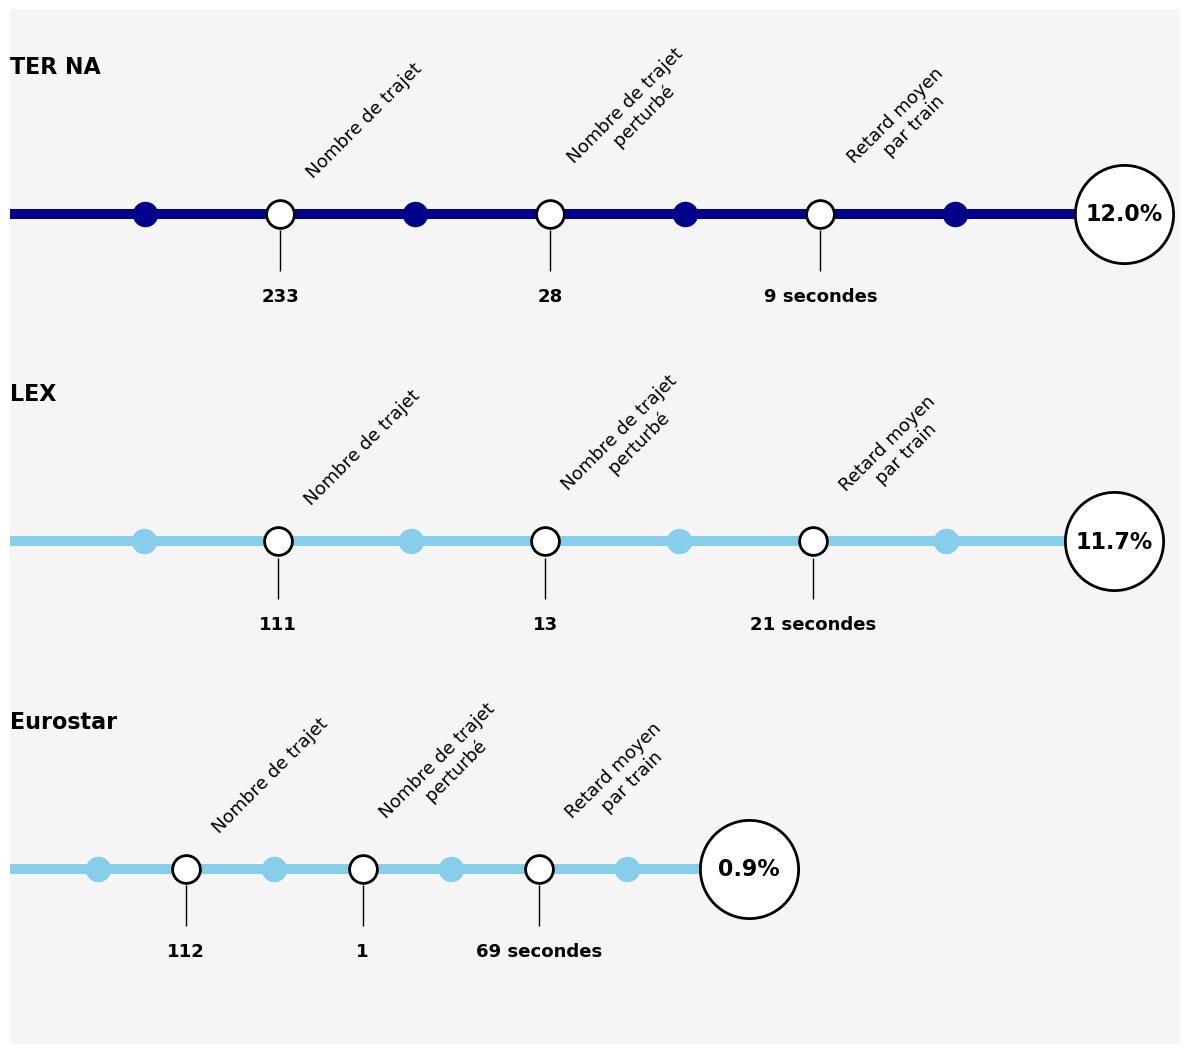

In [25]:
# Filtrage des éléments désirés directement avec Pandas
per_disrupted_vehicle_by_network_part1 = per_disrupted_vehicle_by_network.iloc[:3]

# Création d'une nouvelle Series avec les transformations souhaitées
transformation = (per_disrupted_vehicle_by_network_part1 + 20) * 0.1

# Configuration initiale de la figure
fig, ax = plt.subplots(figsize=(12, 12))
colors = ["skyblue", "skyblue", 'darkblue']

# Création du diagramme à barres horizontales
bars = ax.barh(transformation.index, transformation, color=colors, height=0.03)

# Calcul des positions pour les marqueurs
x_positions = transformation + 0.1

# Ajout de marqueurs blancs
ax.scatter(x_positions, transformation.index, facecolors='white', edgecolors='black', linewidths=2, s=5000)

# Définition des intervalles pour les éléments décoratifs
intervals_white = [2/8, 4/8, 6/8]
intervals_black = [1/8, 3/8, 5/8, 7/8]

# Boucle pour ajouter du texte et des décorations supplémentaires sur les barres
for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    
    # Ajout de texte pour le pourcentage
    ax.text(new_x, y, f'{bar.get_width()/0.1 - 20:.1f}%', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Ajouter le nom du réseau au-dessus de chaque barre
    ax.text(0, y + bar.get_height() + 0.4, per_disrupted_vehicle_by_network_part1.index[j], fontsize=16, fontweight='bold')
    
    # Ajout de cercles et de lignes avec du texte
    for i, interval in enumerate(intervals_white):
        circle_x = bar.get_width() * interval
        # Ajouter cercle blanc et ligne
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=400)
        ax.vlines(circle_x, y - 0.05, y - 0.175, colors='black', linewidth=1)
        # Ajouter texte spécifique sous la ligne
        current_info_value = info[i][transformation.index[j]]
        ax.text(circle_x, y - 0.225, f'{current_info_value}', ha='center', va='top', fontsize=13, fontweight='bold')
        # Ajouter texte spécifique au-dessus du cercle
        ax.text(circle_x + 0.25, y + 0.1, info_name[i], ha='center', va='bottom', fontsize=13, rotation=45)
        
    # Ajout de cercles colorés pour les intervalles neutre
    for interval in intervals_black:
        circle_x = bar.get_width() * interval
        ax.scatter(circle_x, y, facecolors=colors[j], s=300)

# Configuration finale du graphique
ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)
plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Perturbation_ligne_part4.png", dpi = 300)
plt.show()

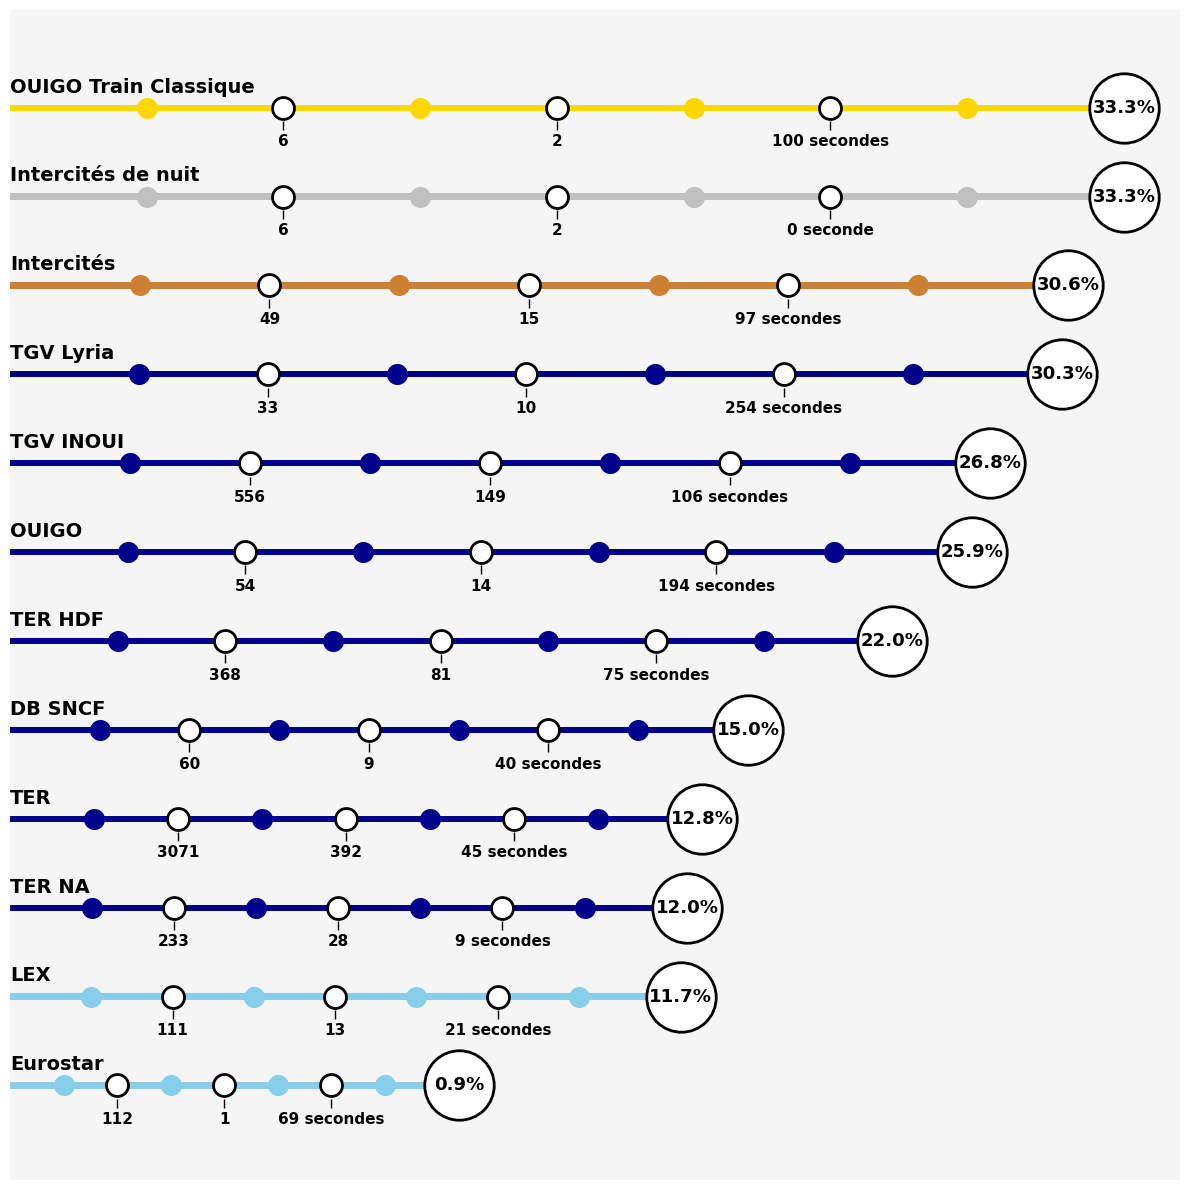

In [26]:
# Filtrage des éléments désirés directement avec Pandas
per_disrupted_vehicle_by_network_part1 = per_disrupted_vehicle_by_network

# Création d'une nouvelle Series avec les transformations souhaitées
transformation = (per_disrupted_vehicle_by_network_part1 + 20) * 0.1

# Configuration initiale de la figure
fig, ax = plt.subplots(figsize=(12, 12))
colors = ["skyblue", "skyblue", 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', "#CD7F32", "#C0C0C0", "#FFD700"]

# Création du diagramme à barres horizontales
bars = ax.barh(transformation.index, transformation, color=colors, height=0.07)

# Calcul des positions pour les marqueurs
x_positions = transformation + 0.1

# Ajout de marqueurs blancs
ax.scatter(x_positions, transformation.index, facecolors='white', edgecolors='black', linewidths=2, s=2500)

# Définition des intervalles pour les éléments décoratifs
intervals_white = [2/8, 4/8, 6/8]
intervals_black = [1/8, 3/8, 5/8, 7/8]

# Boucle pour ajouter du texte et des décorations supplémentaires sur les barres
for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    
    # Ajout de texte pour le pourcentage
    ax.text(new_x, y, f'{bar.get_width()/0.1 - 20:.1f}%', ha='center', va='center', fontsize=13, fontweight='bold')
    
    # Ajouter le nom du réseau au-dessus de chaque barre
    ax.text(0, y + bar.get_height() + 0.1, per_disrupted_vehicle_by_network_part1.index[j], fontsize=14, fontweight='bold')
    
    # Ajout de cercles et de lignes avec du texte
    for i, interval in enumerate(intervals_white):
        circle_x = bar.get_width() * interval
        # Ajouter cercle blanc et ligne
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=250)
        ax.vlines(circle_x, y - 0.25, y - 0.15, colors='black', linewidth=1)
        # Ajouter texte spécifique sous la ligne
        current_info_value = info[i][transformation.index[j]]
        ax.text(circle_x, y - 0.3, f'{current_info_value}', ha='center', va='top', fontsize=11, fontweight='bold')
        
    # Ajout de cercles colorés pour les intervalles neutre
    for interval in intervals_black:
        circle_x = bar.get_width() * interval
        ax.scatter(circle_x, y, facecolors=colors[j], s=200)

# Configuration finale du graphique
ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)
plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Perturbation_ligne_global.png", dpi = 300)
plt.show()

## 

### ROUTES LES PLUS PERTUBEES (graphique à faire)

In [27]:
vehicle_by_route = df_merge.groupby('route_name')['vehicle_id'].count()
vehicle_by_route = vehicle_by_route[vehicle_by_route >= 10]
vehicle_by_route

route_name
(Namur) - (Charleroi) - Maubeuge    18
Alençon - Château Du Loir           12
Ambérieu - Chambery                 12
Amsterdam Centraal - Paris Nord     11
Angers St Laud - Le Mans            25
                                    ..
Tours - Le Croisic                  16
Tours - Loches                      12
Tours - Saumur - Angers - Nantes    11
Wissembourg - Neustadt              32
YVETOT - ROUEN - ELBEUF             32
Name: vehicle_id, Length: 170, dtype: int64

In [28]:
# Calcul du nombre de perturbation par ligne (route)
disrupted_vehicle_by_route = df_merge[df_merge['id_disruption'].notna()].groupby('route_name')['vehicle_id'].count()
disrupted_vehicle_by_route

route_name
11. Poitiers-Tours                                    2
Ambérieu - Chambery                                   2
Angers St Laud - Le Mans                              4
Annecy - Paris - Gare de Lyon - Hall 1 & 2            3
Avignon Centre - Paris - Gare de Lyon - Hall 1 & 2    1
                                                     ..
Tours - Saumur - Angers - Nantes                      1
Tours - Saumur - Bressuire - La Roche sur Yon         1
Tours-Vendôme-Châteaudun                              1
Valenciennes - Paris Nord                             1
Wissembourg - Neustadt                                4
Name: vehicle_id, Length: 193, dtype: int64

In [29]:
per_disrupted_vehicle_by_route = disrupted_vehicle_by_route/vehicle_by_route *100

In [30]:
winners = per_disrupted_vehicle_by_route.sort_values(ascending=True)[:10]
nb_train_winners = vehicle_by_route[winners.index]

print(f"Les 10 routes les moins impactées (min 10 trajets)\n\n {winners} \n\n\n")
print(f"Nombre de trajet des 10 routes les moins impactées\n\n {nb_train_winners}")

Les 10 routes les moins impactées (min 10 trajets)

 route_name
Metz - Sarrebruck                2.631579
Besançon - Lyon P D              4.166667
Nantes - Savenay                 4.166667
C51                              4.347826
C50                              4.347826
Nice - Breil Sur Roya - Tende    4.761905
CAEN - ROUEN                     5.000000
L6                               5.263158
K50                              5.263158
Strasbourg - Molsheim            5.263158
Name: vehicle_id, dtype: float64 



Nombre de trajet des 10 routes les moins impactées

 route_name
Metz - Sarrebruck                76
Besançon - Lyon P D              24
Nantes - Savenay                 24
C51                              23
C50                              23
Nice - Breil Sur Roya - Tende    21
CAEN - ROUEN                     20
L6                               19
K50                              38
Strasbourg - Molsheim            38
Name: vehicle_id, dtype: int64


In [31]:
losers = per_disrupted_vehicle_by_route.sort_values(ascending=False)[:10]
nb_train_losers = vehicle_by_route[losers.index]

print(f"Les 10 routes les plus impactées (min 10 trajets)\n\n {losers} \n\n\n")
print(f"Nombre de trajet des 10 routes les plus impactées\n\n {nb_train_losers}")

Les 10 routes les plus impactées (min 10 trajets)

 route_name
Saint-Marcellin - Grenoble Universités Gières              75.000000
St André-le-Gaz - Grenoble - Chambéry                      63.157895
P42                                                        60.000000
Paris - Montparnasse - Hall 1 & 2 - Quimper                57.894737
Montpellier Saint-Roch - Avignon Centre                    57.142857
Grenoble - Paris - Gare de Lyon - Hall 1 & 2               53.846154
K40                                                        52.173913
Paris - Montparnasse - Hall 1 & 2 - Bordeaux Saint-Jean    50.000000
C40                                                        48.837209
Marseille - Miramas Via Cote Bleue                         43.333333
Name: vehicle_id, dtype: float64 



Nombre de trajet des 10 routes les plus impactées

 route_name
Saint-Marcellin - Grenoble Universités Gières              32
St André-le-Gaz - Grenoble - Chambéry                      19
P42                    

## 

### ARRETS LES PLUS IMPACTES (Graphique N°2)

Note : 
- Trouver shapefille de l'Europe
- Mettre police d'écriture de météo france
- Ecrire le nombre de perturbation pour chaque gare le plus loin possible des autres textes/gares
- couleurs de la carte qui varie selon les valuers autour 

In [27]:
most_impacted_stop = df_merge.groupby('name_stop')['vehicle_id'].count().sort_values(ascending=False)[:50]

print(f"Arrets les plus impactés par les perturbations : \n\n {most_impacted_stop}")

Arrets les plus impactés par les perturbations : 

 name_stop
Paris - Montparnasse - Hall 1 & 2          54
Lille Flandres                             47
Lyon Part Dieu                             38
Paris - Gare de Lyon - Hall 1 & 2          34
Toulouse Matabiau                          33
Paris Nord                                 23
Strasbourg                                 22
Chambéry - Challes-les-Eaux                21
Basel SBB                                  19
Bordeaux Saint-Jean                        18
Rennes                                     18
Genève Cornavin                            17
Nancy                                      17
Les Cauquillous                            16
Nantes                                     16
Lyon - Jean Macé                           16
Grenoble                                   13
Vitrolles - Aéroport Marseille Provence    13
Marne-la-Vallée - Chessy                   12
Casino Lacroix Laval                       11
Orléans           

##### Regroupement ville/gare tres proche

In [28]:
stops_lon_lat = df_merge[df_merge['name_stop'].isin(most_impacted_stop.index)].groupby('name_stop').agg({'lon': 'first', 'lat': 'first'}).reset_index()

In [29]:
most_impacted_stop =  most_impacted_stop.sort_index()
most_impacted_stop_new = {}
name_to_ereased = []

for i in range(len(most_impacted_stop)):
    count_disruption_city = most_impacted_stop.iloc[i]

    for j in range(i + 1, len(most_impacted_stop)):
        if (int(stops_lon_lat['lon'].iloc[i] * 10) / 10 == int(stops_lon_lat['lon'].iloc[j] * 10) / 10) and \
           (int(stops_lon_lat['lat'].iloc[i] * 10) / 10 == int(stops_lon_lat['lat'].iloc[j] * 10) / 10):
            count_disruption_city += most_impacted_stop.iloc[j]        
            name_to_ereased.append(most_impacted_stop.index[j])
    
    most_impacted_stop_new[most_impacted_stop.index[i]] = count_disruption_city    
    
most_impacted_stop_new = pd.Series(most_impacted_stop_new, name="Total Disruptions").drop(name_to_ereased)

##### Suppression de la gare la moins perturbée quand regroupement de gare proche mais pas suffisement pour former un meme point

In [30]:
stops_lon_lat_new = df_disruption[df_disruption['name_stop'].isin(most_impacted_stop_new.index)].groupby('name_stop').agg({'lon': 'first', 'lat': 'first'}).reset_index()

In [31]:
name_to_erase = []

for i in range(len(most_impacted_stop_new)):
    list_stop = [(most_impacted_stop_new.index[i], most_impacted_stop_new.iloc[i])]
    for j in range(i + 1, len(most_impacted_stop_new)):
        if abs(stops_lon_lat_new['lon'].iloc[i] - stops_lon_lat_new['lon'].iloc[j]) < 0.5 and \
           abs(stops_lon_lat_new['lat'].iloc[i] - stops_lon_lat_new['lat'].iloc[j]) < 0.5:
            list_stop.append((most_impacted_stop_new.index[j], most_impacted_stop_new.iloc[j]))
    
    if len(list_stop) > 1:
        list_stop.sort(key=lambda x: x[1])
        name_to_erase.extend([idx for idx, _ in list_stop[:-1]])

name_to_erase = list(set(name_to_erase))

most_impacted_stop_new_V2 = most_impacted_stop_new.drop(name_to_erase)

##### Graphique

In [32]:
stops_lon_lat_new_v2 = df_disruption[df_disruption['name_stop'].isin(most_impacted_stop_new_V2.index)].groupby('name_stop').agg({'lon': 'first', 'lat': 'first'}).reset_index()

longitudes = list(stops_lon_lat_new_v2['lon'])
latitudes = list(stops_lon_lat_new_v2['lat'])

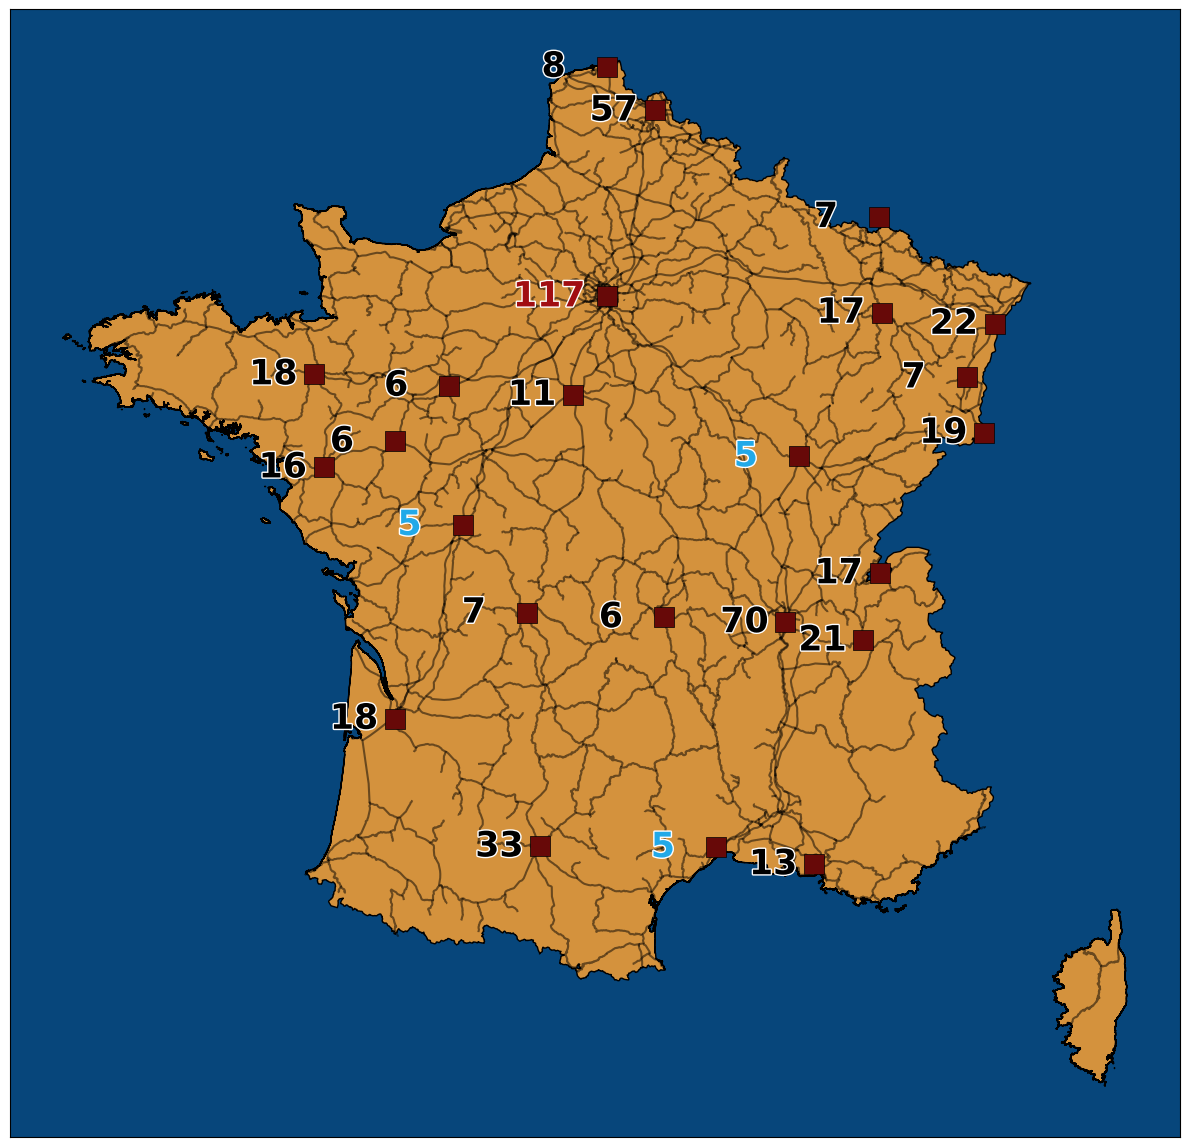

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('#07467b')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Chargement et affichage des données géospatiales
france = gpd.read_file('data/France/FRA_adm0.shp')
reseau = gpd.read_file('formes-des-lignes-du-rfn/formes-des-lignes-du-rfn.shp')
# Plot de la carte de France
france.plot(ax=ax, color='#d4923d', edgecolor='black', zorder=2) 
# Plot du réseau sur la carte
reseau.plot(ax=ax, color='black', alpha=0.5)

# Ajout des points d'arrêts impactés
ax.scatter(longitudes, latitudes, s=200, color='#670908', edgecolor='black', linewidth=0.5, zorder=3, alpha=1, marker='s')

# Boucle pour afficher le nombre de perturbations par arrêt
for lon, lat, value in zip(longitudes, latitudes, list(most_impacted_stop_new_V2)):
    # Ajustement de la position du texte en fonction de la valeur
    minuslon = 1.3 if value >= 100 else 0.9
    
    # Effet de texte pour améliorer la lisibilité
    text_effect = patheffects.withStroke(linewidth=2, foreground="white")
    
    # Couleur du texte en fonction de la valeur
    if value == max(most_impacted_stop_new_V2):
        color = '#a10e12'  # Couleur pour la valeur maximale
    elif value == min(most_impacted_stop_new_V2):
        color = '#21a9e8'  # Couleur pour la valeur minimale
    else:
        color = 'black'  # Couleur par défaut

    # Affichage du texte
    ax.text(lon - minuslon, lat, str(value), verticalalignment='center', fontsize=25, color=color, fontweight='bold', path_effects=[text_effect])

# Finalisation et sauvegarde de la figure
plt.tight_layout()
plt.savefig("Meteo_retard_couleur.png", dpi=300)
plt.show()

## 

### NOMBRE DE PERTURBATION AU FIL DE LA JOURNEE ET CAUSE DE PERTURBATION (Graphique N°3) 

#####  Causes de perturbations

In [34]:
causes_disruption = df_merge.groupby('cause_delay')['id_disruption'].count().sort_values(ascending=True)

print(f"cause de perturbation les moins fréquentes de la journée : \n\n {causes_disruption}")

cause de perturbation les moins fréquentes de la journée : 

 cause_delay
Affluence de voyageurs entraînant un arrêt prolongé      1
Arrêt exceptionnel en gare                               1
Assistance à un voyageur                                 1
Assistance à un voyageur malade à bord                   1
Heurt d'un animal                                        1
Erreur d'itinéraire                                      1
Confirmation tardive de la voie                          1
Modification de matériel                                 1
Déclenchement du signal d'alarme                         1
Présence d'animaux sur la voie                           1
Incident sur un réseau ferré étranger                    2
Présence d'individus sur les voies                       5
Intervention des forces de l'ordre                       6
Panne d'un aiguillage                                    7
Indisponibilité d'un matériel                            7
Incident de circulation                  

In [35]:
# Calcul pourcentage d'apparition des différentes causes de perturbations
per_causes_disruption = causes_disruption/sum(causes_disruption)*100
per_causes_disruption

cause_delay
Affluence de voyageurs entraînant un arrêt prolongé     0.131579
Arrêt exceptionnel en gare                              0.131579
Assistance à un voyageur                                0.131579
Assistance à un voyageur malade à bord                  0.131579
Heurt d'un animal                                       0.131579
Erreur d'itinéraire                                     0.131579
Confirmation tardive de la voie                         0.131579
Modification de matériel                                0.131579
Déclenchement du signal d'alarme                        0.131579
Présence d'animaux sur la voie                          0.131579
Incident sur un réseau ferré étranger                   0.263158
Présence d'individus sur les voies                      0.657895
Intervention des forces de l'ordre                      0.789474
Panne d'un aiguillage                                   0.921053
Indisponibilité d'un matériel                           0.921053
Incident de c

In [36]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 15088
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   vehicle_id        8991 non-null   object         
 1   route_id          8991 non-null   object         
 2   time_begin        8991 non-null   timedelta64[ns]
 3   time_end          8991 non-null   timedelta64[ns]
 4   train_type        8991 non-null   object         
 5   id_disruption     1417 non-null   object         
 6   data_date         8991 non-null   object         
 7   id_stop           833 non-null    object         
 8   name_stop         833 non-null    object         
 9   lon               833 non-null    float64        
 10  lat               833 non-null    float64        
 11  disruption_start  833 non-null    datetime64[ns] 
 12  disruption_end    833 non-null    datetime64[ns] 
 13  arrival_delay     833 non-null    float64        
 14  departure_de

In [37]:
df_disruption_unique = df_disruption.drop_duplicates(['id_disruption','vehicle_id'])

start = [t.time() for t in df_disruption_unique['disruption_start']]
end = [t.time() for t in df_disruption_unique['disruption_end']]

In [38]:
start_time = datetime(2023, 1, 1, 0, 0) 
end_time = datetime(2023, 1, 2, 0, 0)  

ten_intervals = []
current_time = start_time
while current_time < end_time:
    ten_intervals.append(current_time.time())
    current_time += timedelta(minutes=10)

In [39]:
hours_intervals_name = []
count=6

for t in range(0,len(ten_intervals)):
    if count == 6 :
        hours_intervals_name.append(str(ten_intervals[t])[:5])
        count=0
    else :
        hours_intervals_name.append('')
    count+= 1

In [40]:
disrupiton_by_ten = []

for time in ten_intervals:
    nb_disruption = 0
    for i in range(len(start)):
        if time > start[i] and time < end[i]:
            nb_disruption += 1 
    disrupiton_by_ten.append(nb_disruption)

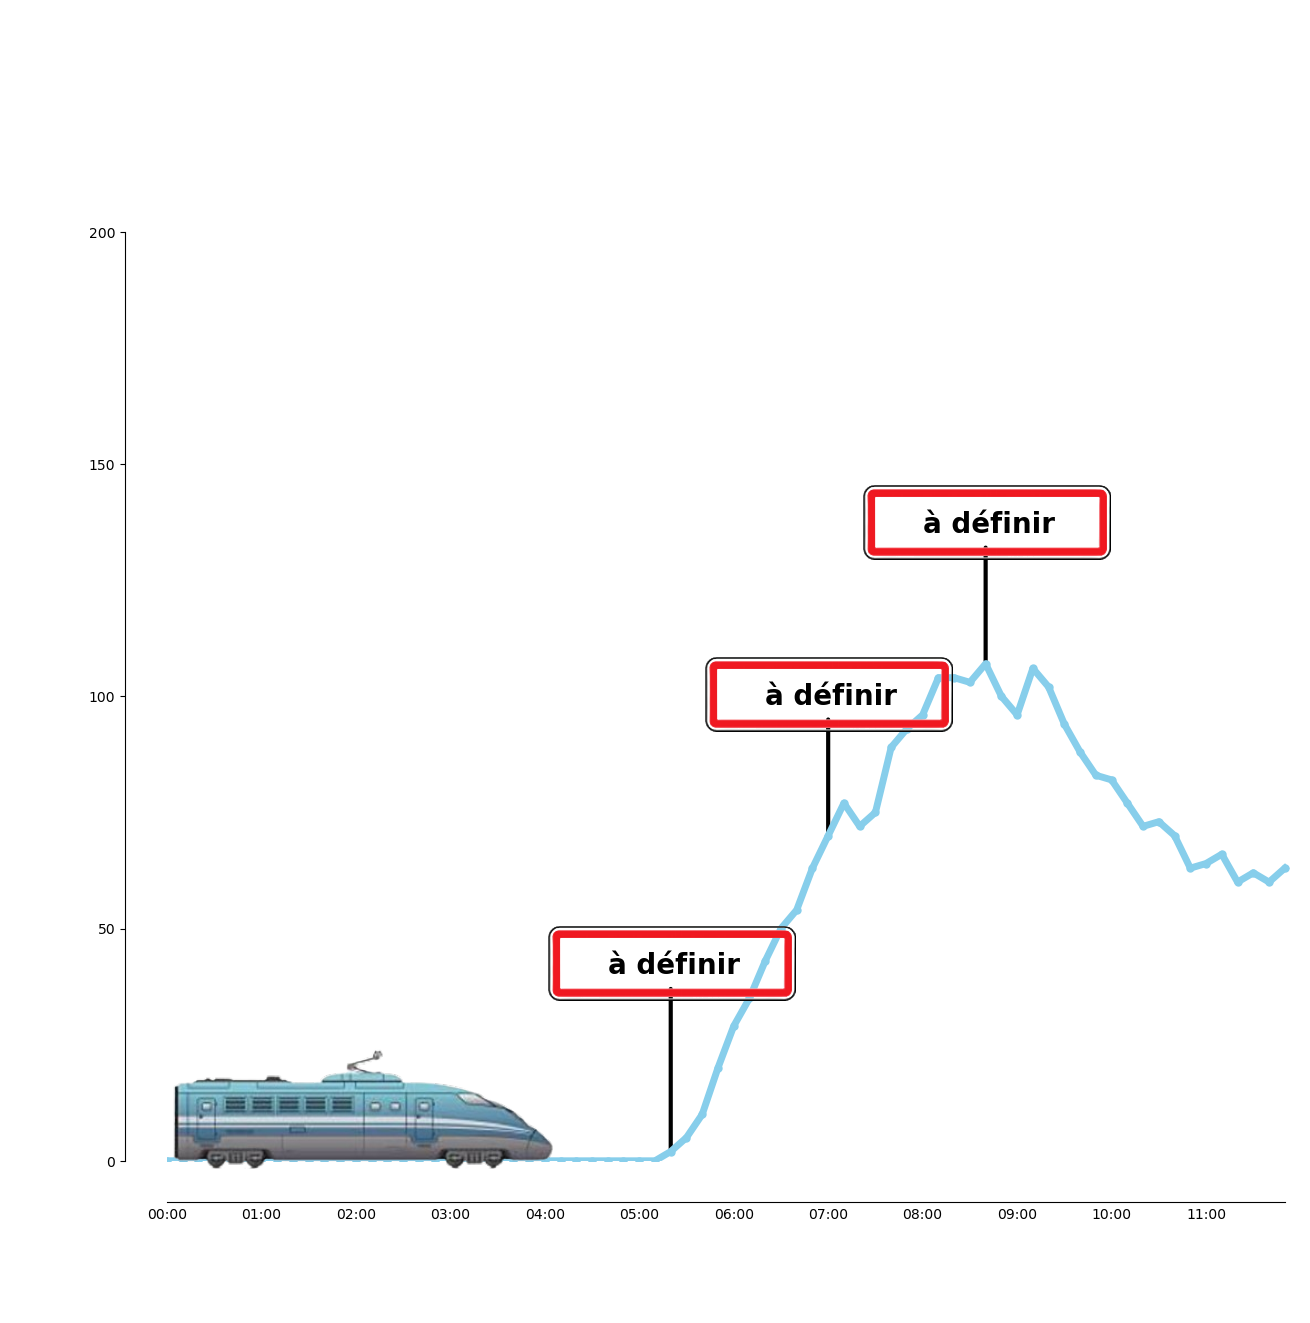

In [41]:
disrupiton_by_ten_1 = disrupiton_by_ten[:72]

plt.figure(figsize=(12, 12))
plt.plot(range(len(disrupiton_by_ten_1)), disrupiton_by_ten_1, c='skyblue', lw=5, marker='o', markersize=5)
plt.xticks(range(len(disrupiton_by_ten_1)), hours_intervals_name[:72])
plt.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

#xlim et ylim
plt.xlim(0, len(disrupiton_by_ten_1)) 
max_y_value = max(disrupiton_by_ten)*1.4
plt.ylim(0, max_y_value)  


# Image du train
img = mpimg.imread('Data/train_wb.png')
imagebox = OffsetImage(img, zoom=0.8)
ab = AnnotationBbox(imagebox, (13.5, 14), frameon=False)
plt.gca().add_artist(ab)


# Point de départ
start_value = [x for x in disrupiton_by_ten_1 if x != 0][0]
start_index = disrupiton_by_ten_1.index(start_value)

# Premier arret
max_value = max(disrupiton_by_ten_1)
max_index = disrupiton_by_ten_1.index(max_value)


# Deuxieme arret
max_value_2 = max(disrupiton_by_ten_1[max_index+12:])
max_index_2 = disrupiton_by_ten_1.index(max_value_2)


list_value = [start_value, max_value,max_value_2]
list_index = [start_index, max_index,max_index_2]


img_arrets = mpimg.imread('Data/arrets_wb.png')
imagebox_arrets = OffsetImage(img_arrets, zoom=0.2)
    
for i in range(len(list_value)):

    if i == 0 :
        y_offset = list_value[i] + 40 
    else : 
        y_offset = list_value[i] + 30 
        
    ab_arrets = AnnotationBbox(imagebox_arrets, (list_index[i], y_offset), frameon=False)
    plt.gca().add_artist(ab_arrets)

    xyA = (list_index[i], y_offset-5)  
    xyB = (list_index[i], list_value[i])

    con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",lw=3, mutation_scale=10)

    plt.gca().add_artist(con)
    
    plt.text(list_index[i]-4, y_offset, 'à définir', verticalalignment='center', fontsize=20, color='black', fontweight='bold')

sns.despine(offset=30, trim=True)
plt.savefig("Perturbation_journée_part1.png", dpi=300)
plt.show()

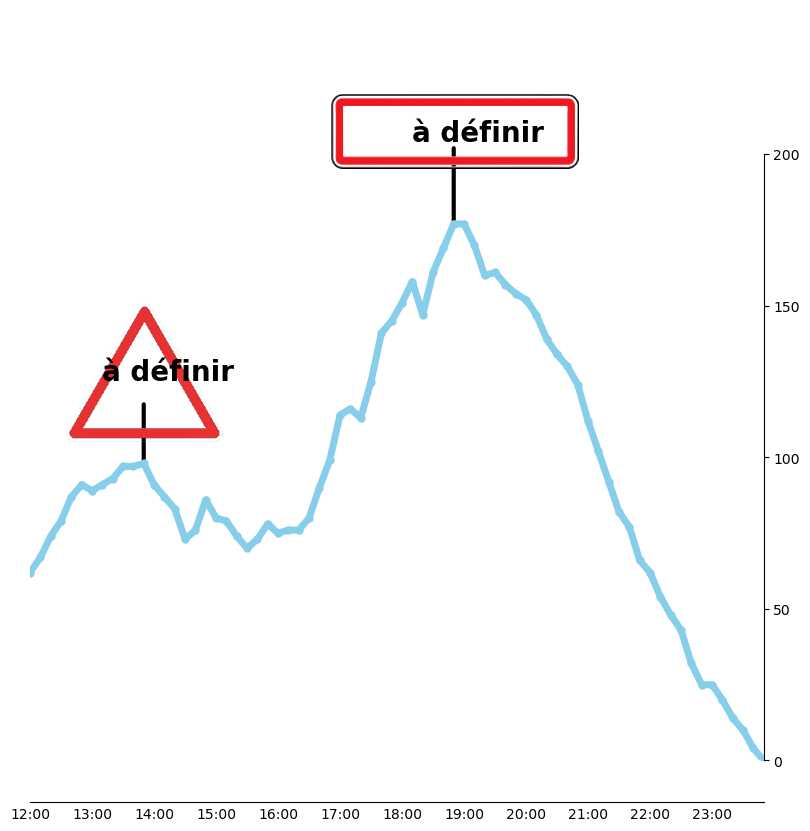

In [42]:
disrupiton_by_ten_2 = disrupiton_by_ten[72:]

plt.figure(figsize=(8, 8))
plt.plot(range(len(disrupiton_by_ten_2)), disrupiton_by_ten_2, c='skyblue', lw=5, marker='o', markersize=5)
plt.xticks(range(len(disrupiton_by_ten_2)), hours_intervals_name[72:],)
plt.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

# xlim et ylim
plt.xlim(0, len(disrupiton_by_ten_2)-1) 
max_y_value = max(disrupiton_by_ten_2)*1.4
plt.ylim(0, max_y_value)  


#Premier danger 
danger_value = max(disrupiton_by_ten_2[:12])
danger_index = disrupiton_by_ten_2.index(danger_value)

# Premier arret
max_value = max(disrupiton_by_ten_2)
max_index = disrupiton_by_ten_2.index(max_value)


list_value = [danger_value, max_value]
list_index = [danger_index, max_index]
list_image = ['danger_wb','arrets_wb']
list_zoom = [0.5,0.2]
    
for i in range(len(list_value)):
    
    img_arrets = mpimg.imread(f'Data/{list_image[i]}.png')
    imagebox_arrets = OffsetImage(img_arrets, zoom=list_zoom[i])
    
    y_offset = list_value[i] + 30 
        
    ab_arrets = AnnotationBbox(imagebox_arrets, (list_index[i], y_offset), frameon=False)
    plt.gca().add_artist(ab_arrets)

    if list_image[i] == 'danger_wb':
        xyA = (list_index[i], y_offset-10.5)
    else :
        xyA = (list_index[i], y_offset-5)

    xyB = (list_index[i], list_value[i])

    con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",lw=3, mutation_scale=10)

    plt.gca().add_artist(con)
    
    plt.text(list_index[i]-4, y_offset, 'à définir', verticalalignment='center', fontsize=20, color='black', fontweight='bold')


sns.despine(offset=30, trim=True)

ax = plt.gca()
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.yaxis.tick_right()

plt.savefig("Perturbation_journée_part2.png", dpi=300)
plt.show()

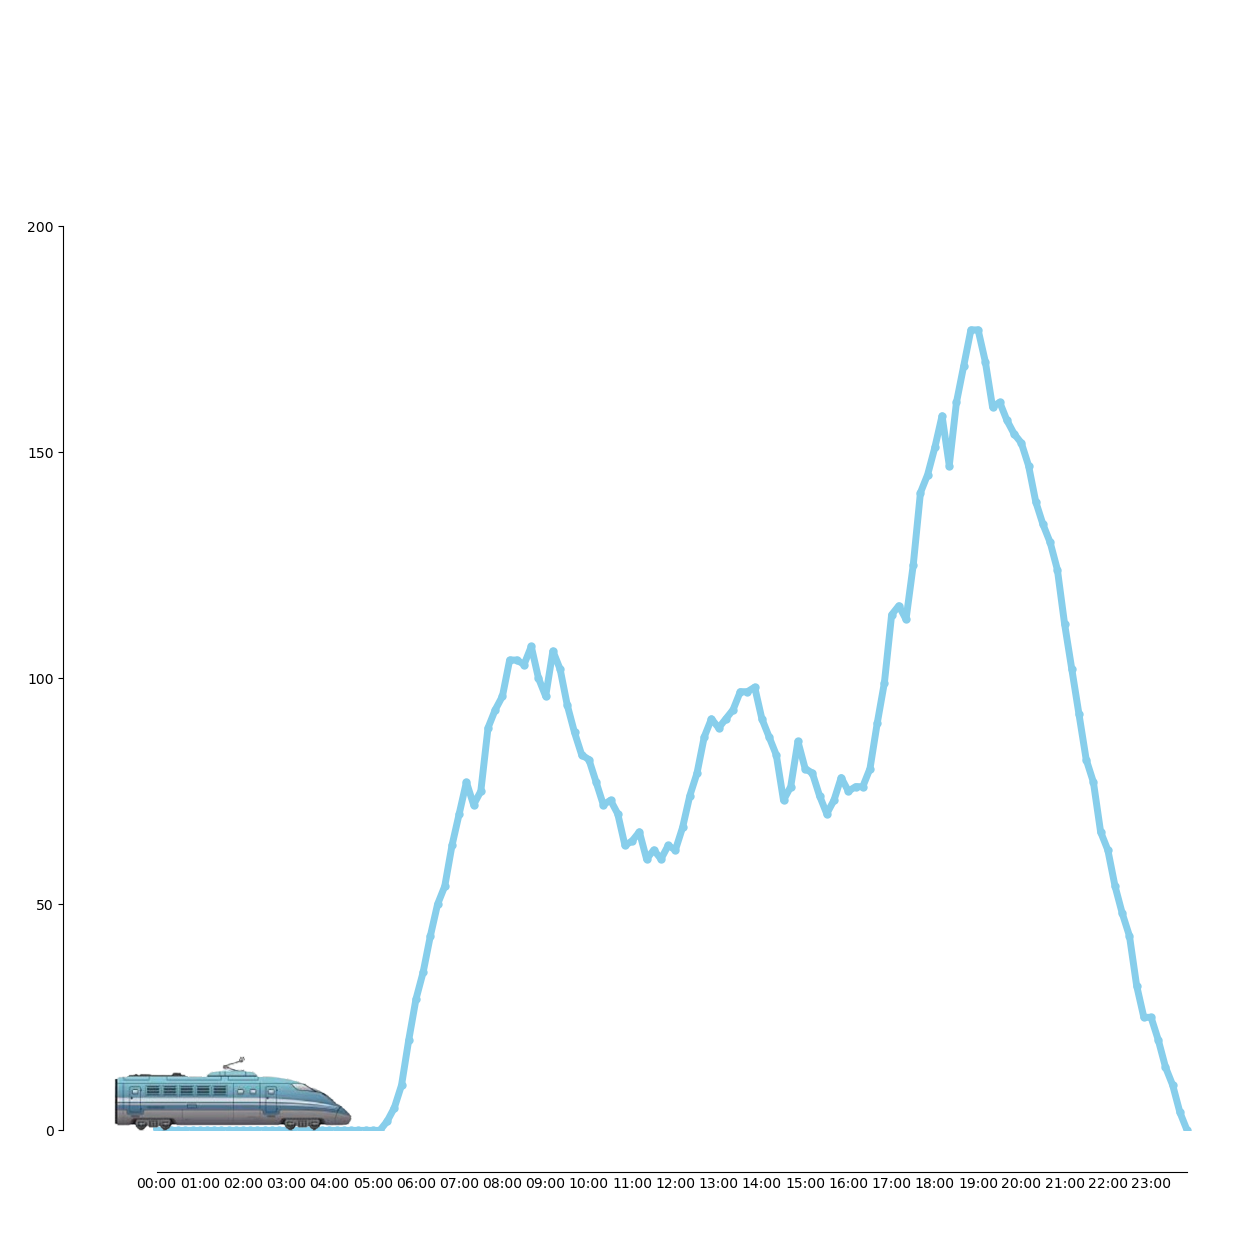

In [43]:
plt.figure(figsize=(12, 12))
plt.plot(range(len(disrupiton_by_ten)), disrupiton_by_ten, c='skyblue', lw=5, marker='o', markersize=5)
plt.xticks(range(len(disrupiton_by_ten)), hours_intervals_name, rotation=30, fontsize=14)
plt.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

# xlim et ylim
max_y_value = max(disrupiton_by_ten) * 1.4
plt.ylim(0, max_y_value)  

# Image du train
img = mpimg.imread('Data/train_wb.png')
imagebox = OffsetImage(img, zoom=0.5)
ab = AnnotationBbox(imagebox, (12, 10), frameon=False)
plt.gca().add_artist(ab)

sns.despine(offset=30, trim=True)
plt.savefig("Test_remplissage.png", dpi=300)
plt.show()
